In [46]:
import numpy as np
import pandas as pd

class MyDecisionTree:
    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
    class Leaf:
        def __init__(self, value=None):
            self.value = value

    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def cost_function(self, y):
        return self._gini(y)

    def max_depth(self):
        return self.max_depth

    def prune(self):
        pass

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def score(self, X, y):
        predictions = self.predict(X)
        return np.sum(predictions == y) / len(y)

    def fit(self, X, y):
        self.root = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if self.max_depth is not None and depth >= self.max_depth:
            return self._create_leaf(y)

        if n_classes == 1:
            return self._create_leaf(y)

        if n_samples <= 1:
            return self._create_leaf(y)

        best_feature, best_threshold = self.make_split(X, y)
        left_indices, right_indices = self._split_data(X, best_feature, best_threshold)

        if len(left_indices) == 0 or len(right_indices) == 0:
            return self._create_leaf(y)

        left_subtree = self._grow_tree(X[left_indices, :], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices, :], y[right_indices], depth + 1)

        return self._create_decision_node(best_feature, best_threshold, left_subtree, right_subtree)

    def make_split(self, X, y):
        best_gain = 0
        best_feature = None
        best_threshold = None

        parent_score = self._gini(y)
        n_samples, n_features = X.shape

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_indices, right_indices = self._split_data(X, feature, threshold)

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                left_score = self._gini(y[left_indices])
                right_score = self._gini(y[right_indices])

                gain = parent_score - (len(left_indices) / n_samples) * left_score - (len(right_indices) / n_samples) * right_score

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini(self, y):
        if len(y) == 0:
            return 0

        p = np.bincount(y) / len(y)
        return 1 - np.sum(p**2)

    def _split_data(self, X, feature, threshold):
        left_indices = np.where(X[:, feature] <= threshold)[0]
        right_indices = np.where(X[:, feature] > threshold)[0]
        return left_indices, right_indices

    def _create_leaf(self, y):
        return self.Leaf(value=np.bincount(y).argmax())

    def _create_decision_node(self, feature, threshold, left, right):
        return self.Node(feature=feature, threshold=threshold, left=left, right=right)

    def _traverse_tree(self, x, node):
        if type(node) == self.Leaf:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

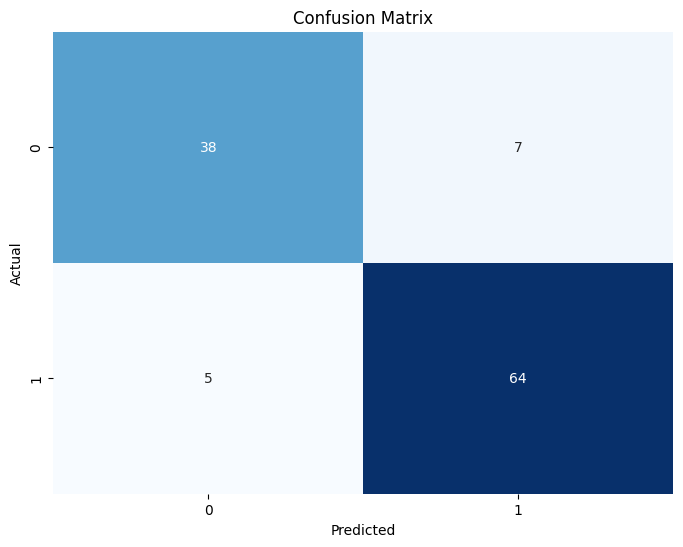

_________________________________________________

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.90      0.93      0.91        69

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114

_________________________________________________



In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = MyDecisionTree()
def custom_classifier(X_train, y_train, X_test, y_test):
    clf = MyDecisionTree()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("_________________________________________________\n")
    print(report)
    print("_________________________________________________\n")
custom_classifier( X_train, y_train, X_test, y_test)